# Titanic Challenge with Logistic Regression

# Import relevant libraries

Pandas is for data manipulation using DataFrame <br>
Numpy is for numeric calculations <br>
sklearn.ensemble imports the model <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Import data into notebook

In [3]:
train_data = pd.read_csv("titanic/data/train.csv")

test_data = pd.read_csv("titanic/data/test.csv")

# Insights

### Women
Because women usually are the first to be protected in those times, it's interesting to see the rate of survival for women. <br>

In [4]:
women_survived = train_data.loc[train_data.Sex == 'female']['Survived']

rate_women_survived = sum(women_survived)/len(women_survived)

rate_women_survived

0.7420382165605095

In [5]:
men_survived = train_data.loc[train_data.Sex == 'male']["Survived"]

rate_men_survived = sum(men_survived)/len(men_survived)

rate_men_survived

0.18890814558058924

## Data exploration

Combining the two datasets (train, test) for exploratory analysis

In [6]:
merged_train_test = pd.concat(
    [
        train_data.drop(["PassengerId", "Survived"], axis=1), 
        test_data.drop(["PassengerId"], axis=1),
    ]
)
y_train = train_data["Survived"].values

Check for missing values

In [7]:
print(merged_train_test.isna().sum())

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


## Info on the merged set

In [8]:
merged_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [9]:
merged_train_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Histogram Passengers x Class

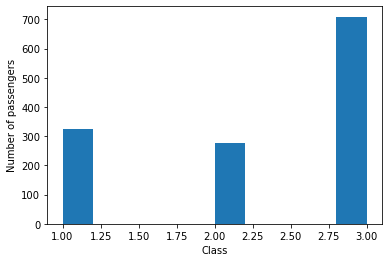

In [10]:
_ = passenger_class = merged_train_test['Pclass']
_ = plt.hist(passenger_class)
plt.ylabel('Number of passengers')
plt.xlabel('Class')
plt.show()

### Swam-bee Passenger x Survived (Male, Female)

/home/andre/miniconda3/envs/data_science/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


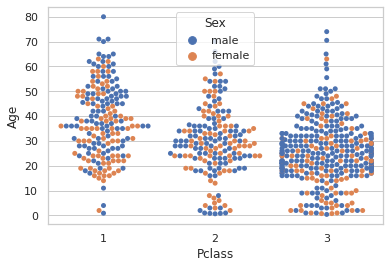

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x="Pclass", y="Age", hue="Sex", data=train_data)

### ECDF with Percentiles

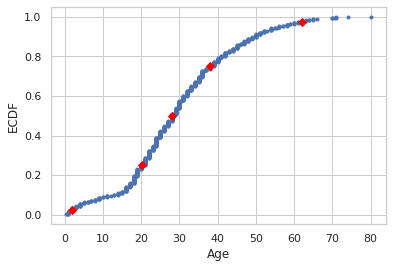

In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

age_without_null = train_data[train_data['Age'].notnull()]['Age']

# Compute ECDF for versicolor data
x_vers, y_vers = ecdf(age_without_null)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('Age')

# Specify array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles
ptiles_age = np.percentile(age_without_null, percentiles)
_ = plt.plot(ptiles_age, percentiles/100, marker='D', color='red',
         linestyle='none')


# Display the plot
plt.show()


## Info on the training set

In [ ]:
train_data.info()

Information on the 11 features of the dataset

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [ ]:
sex_data = pd.get_dummies(train_data["Sex"])

In [ ]:
sex_data.describe()

In [ ]:
train_data.describe()

### Remarks about the dataset

38% of the passengers survived (check mean) <br>
0.4 years old was the min age and 80 was the max age <br>
The min fare was 32 while the max was 512 <br>
The spread in the fare was a 49 <br>
34% of the passengers were women while 64% were man <br>

In [ ]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_temp = train_data.isnull().sum()/train_data.isnull().count()*100
percent_missing_values = round(percent_temp, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_missing_values], axis=1, keys=['Total', '%'])
missing_data.head()

## Graphical Analysis

In [ ]:
passenger_class_not_survived = train_data[train_data['Survived'] == 0]['Pclass']
passenger_class_survived = train_data[train_data['Survived'] == 1]['Pclass']
_ = plt.ylabel('Number of passengers that survived')
_ = plt.xlabel('Class')
_ = plt.hist(passenger_class_survived, alpha=0.5, label='survived')
_ = plt.hist(passenger_class_not_survived, alpha=0.5, label='not survived')
_ = plt.legend(loc='upper left')
plt.show()

# Feature engineering

Because Age and Cabin have lots of missing values, it could be a good idea to remove them from the dataset

In [ ]:
merged_train_test.drop(['Age', 'Cabin'], axis=1)

# Preparing data for training the model

In [ ]:
y = train_data["Survived"]

In [ ]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

In [ ]:
X = pd.get_dummies(train_data[features])

In [ ]:
X_test = pd.get_dummies(test_data[features])

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [ ]:
model.fit(X, y)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
print(train_data['Age'].isnull())

In [ ]:
age_is_null = train_data['Age'].isnull()

In [ ]:
age_is_empty = [x for x in age_is_null if x]

In [ ]:
len(age_is_empty)

In [ ]:
features

In [ ]:
features.append('Cabin')

In [ ]:
def prepare_data():
    global X, X_test
    X = pd.get_dummies(train_data[features])
    X_test = pd.get_dummies(test_data[features])

In [ ]:
prepare_data()

In [ ]:
age_is_null

In [ ]:
train_data[age_is_null]

In [ ]:
no_age = train_data[age_is_null]

In [ ]:
age_is_null

In [ ]:
age_is_not_null = train_data['Age'].notnull()

In [ ]:
age_is_not_null

In [ ]:
with_age = train_data[age_is_not_null]

In [ ]:
with_age.head()

In [ ]:
len(no_age)

In [ ]:
len(with_age)

In [ ]:
type(2)

In [ ]:
type(with_age)

In [ ]:
with_age

In [ ]:
age = train_data['Age']

In [ ]:
type(age)

In [ ]:
age.map

In [ ]:
age.map(lambda x: print(x))

In [ ]:
import math

In [ ]:
math.isnan(nan)

In [ ]:
filled_age = age.map(lambda x: x if math.isnan(x) == False else 28)

In [ ]:
age

In [ ]:
filled_age.head()

In [ ]:
filled_age[6]

In [ ]:
filled_age

In [ ]:
filled_age

In [ ]:
type(filled_age)

In [ ]:
type(X)

In [ ]:
X.head()

In [ ]:
features

In [ ]:
features.append('Age')

In [ ]:
features

In [ ]:
prepare_data()

In [ ]:
X.head()

In [ ]:
X['Age']

In [ ]:
X['Age'] = filled_age

In [ ]:
X.head()

In [ ]:
X['Age'].isnull()

In [ ]:
age

In [ ]:
X['Age']

In [ ]:
prepare_data()

In [ ]:
def train_model():
    global predictions, X, y, X_test
    model.fit(X, y)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission.csv', index=False)
    print("Your submission was successfully saved!")

In [ ]:
model.fit(X, y)

In [ ]:
X['Age']

In [ ]:
X['Age'] = filled_age

In [ ]:
X['Age']

In [ ]:
model.fit(X, y)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test

In [ ]:
def fill_age(age_list, value):
    return age_list.map(lambda x: x if math.isnan(x) == False else value)

In [ ]:
X_test['Age'] = fill_age(X_test['Age'], 28)

In [ ]:
model.predict(X_test)

In [ ]:
def output_predictions(test_data, predictions, message):
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission_' + message + '.csv', index=False)
    print("Your submission " + message + " was successfully saved!")

In [ ]:
output_predictions(test_data, predictions, "age_with_average")

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
test_data

In [ ]:
output_predictions(test_data, predictions, "age_with_average")